In [36]:
# This is adopted from Aman Nagaria submission to Kaggle
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Input data files are available in the '../kaggle/data/' directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

data_path = '../kaggle/data/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
trainLabel=pd.read_csv(data_path + 'trainLabels.csv')


In [37]:
print('train shape:', train.shape)
print('test shape:', test.shape)
print('trainLabel shape:', trainLabel.shape)
train.head()

train shape: (999, 40)
test shape: (9001, 40)
trainLabel shape: (999, 1)


,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
0,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
1,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
2,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
3,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
4,-0.773247,-0.123227,0.047423,-0.210266,10.377793,0.526604,-2.751616,0.315541,0.608603,-0.043421,...,-1.487714,0.792790,-0.540711,0.114115,-0.277477,-0.896411,-2.805207,0.469162,3.614157,0.081689


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 40 columns):
0.29940251144353242      999 non-null float64
-1.2266241875260637      999 non-null float64
1.4984250500215328       999 non-null float64
-1.1761503610375272      999 non-null float64
5.2898525545597037       999 non-null float64
0.20829711393323402      999 non-null float64
2.4044983672405826       999 non-null float64
1.5945062220589785       999 non-null float64
-0.051608163273514231    999 non-null float64
0.66323431039687908      999 non-null float64
-1.4083700642531511      999 non-null float64
1.1147436351160869       999 non-null float64
0.91041530967390116      999 non-null float64
2.2181103179158135       999 non-null float64
4.3056427290235391       999 non-null float64
0.088923978050666208     999 non-null float64
0.1691492586690862       999 non-null float64
0.41344763764684195      999 non-null float64
1.5138621708864943       999 non-null float64
2.6629665829474161   

In [39]:
train.describe()

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.025322,-0.023323,-0.025612,-0.001096,1.088127,-0.006465,0.495433,-0.039517,0.026469,-0.004264,...,0.031533,0.023598,-0.541199,-0.011913,-0.487548,0.032686,0.564443,0.009574,-0.890867,0.609960
std,1.008750,1.016094,0.978412,0.970349,4.539161,0.989601,2.119020,2.232776,1.001562,1.013808,...,1.011767,1.001668,2.240688,1.022922,2.118491,1.007316,2.227304,0.994404,2.022240,2.046400
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.670358,-0.690859,-0.700048,-0.616548,-1.805683,-0.733114,-0.839542,-1.607010,-0.680114,-0.682246,...,-0.659295,-0.696257,-2.123069,-0.664966,-1.880040,-0.643513,-1.060154,-0.689890,-2.214672,-0.565156
50%,0.023121,-0.031181,0.008037,0.003735,0.858932,0.025803,0.571475,0.017761,0.022855,-0.037531,...,0.049792,0.050187,-0.568168,-0.028179,-0.493701,0.036975,0.453544,0.038464,-0.853259,0.780175
75%,0.762980,0.683464,0.657948,0.640968,3.836911,0.671494,1.912284,1.436715,0.741949,0.666416,...,0.747815,0.700093,0.940334,0.651692,0.997741,0.690139,2.120006,0.693603,0.390982,1.994308
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [40]:
# KNN with cross-validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

X, y = train, np.ravel(trainLabel)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


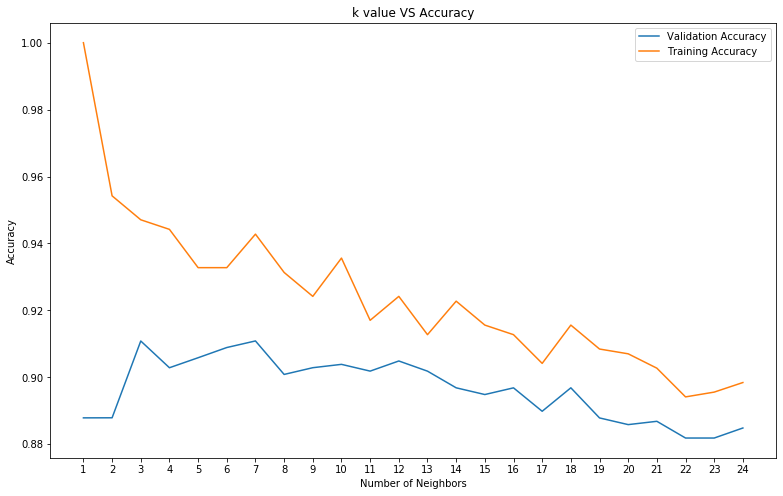

Best Accuracy without feature scaling: 0.9108585858585858
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


In [41]:
# Model complexity
neig = np.arange(1, 25)
kfold = 10
train_accuracy = []
val_accuracy = []
bestKnn = None
bestAcc = 0.0
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    val_accuracy.append(np.mean(cross_val_score(knn, X, y, cv=kfold)))
    if np.mean(cross_val_score(knn, X, y, cv=kfold)) > bestAcc:
        bestAcc = np.mean(cross_val_score(knn, X, y, cv=10))
        bestKnn = knn
        
 # Plot
plt.figure(figsize=[13,8])
plt.plot(neig, val_accuracy, label = 'Validation Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

print('Best Accuracy without feature scaling:', bestAcc)
print(bestKnn)       

In [42]:
# predict test
test_fill = np.nan_to_num(test)
submission = pd.DataFrame(bestKnn.predict(test_fill))
print(submission.shape)
submission.columns = ['Solution']
submission['Id'] = np.arange(1,submission.shape[0]+1)
submission = submission[['Id', 'Solution']]
submission

(9001, 1)


,Id,Solution
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
5,6,0
6,7,1
7,8,0
8,9,0
9,10,0


### Add feature scaling

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

std = StandardScaler()
X_std = std.fit_transform(X)
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)
norm = Normalizer()
X_norm = norm.fit_transform(X)

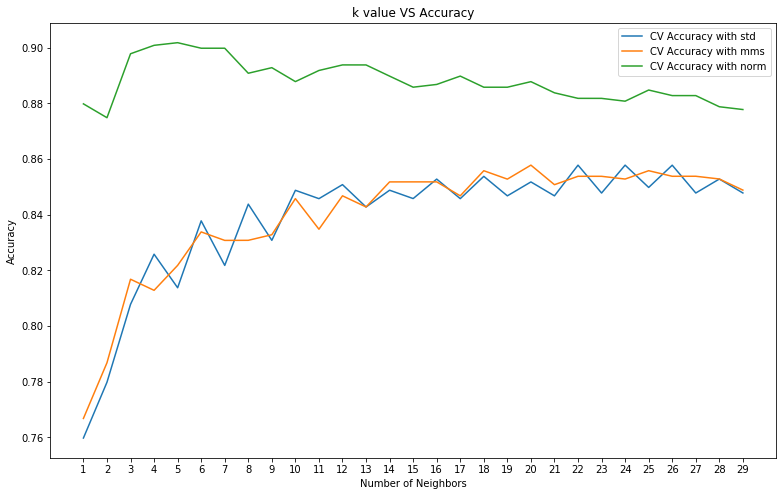

Best Accuracy with feature scaling: 0.9018484848484848
Best kNN classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Best scaling: norm


In [44]:
# Model complexity
neig = np.arange(1, 30)
kfold = 10
val_accuracy = {'std':[], 'mms':[], 'norm':[]}
bestKnn = None
bestAcc = 0.0
bestScaling = None
# Loop over different values of k
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    # validation accuracy
    s1 = np.mean(cross_val_score(knn, X_std, y, cv=kfold))
    val_accuracy['std'].append(s1)
    s2 = np.mean(cross_val_score(knn, X_mms, y, cv=kfold))
    val_accuracy['mms'].append(s2)
    s3 = np.mean(cross_val_score(knn, X_norm, y, cv=kfold))
    val_accuracy['norm'].append(s3)
    if s1 > bestAcc:
        bestAcc = s1
        bestKnn = knn
        bestScaling = 'std'
    elif s2 > bestAcc:
        bestAcc = s2
        bestKnn = knn
        bestScaling = 'mms'
    elif s3 > bestAcc:
        bestAcc = s3
        bestKnn = knn
        bestScaling = 'norm'

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, val_accuracy['std'], label = 'CV Accuracy with std')
plt.plot(neig, val_accuracy['mms'], label = 'CV Accuracy with mms')
plt.plot(neig, val_accuracy['norm'], label = 'CV Accuracy with norm')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()    

print('Best Accuracy with feature scaling:', bestAcc)
print('Best kNN classifier:', bestKnn)
print('Best scaling:', bestScaling)

In [45]:
# predict on test
bestKnn.fit(X_norm, y)
submission = pd.DataFrame(bestKnn.predict(norm.transform(test_fill)))
print(submission.shape)
submission.columns = ['Solution']
submission['Id'] = np.arange(1,submission.shape[0]+1)
submission = submission[['Id', 'Solution']]
submission

(9001, 1)


,Id,Solution
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
5,6,0
6,7,1
7,8,0
8,9,0
9,10,1


In [46]:
submission.to_csv('submission_with_scaling.csv', index=False)


## Feature Selection

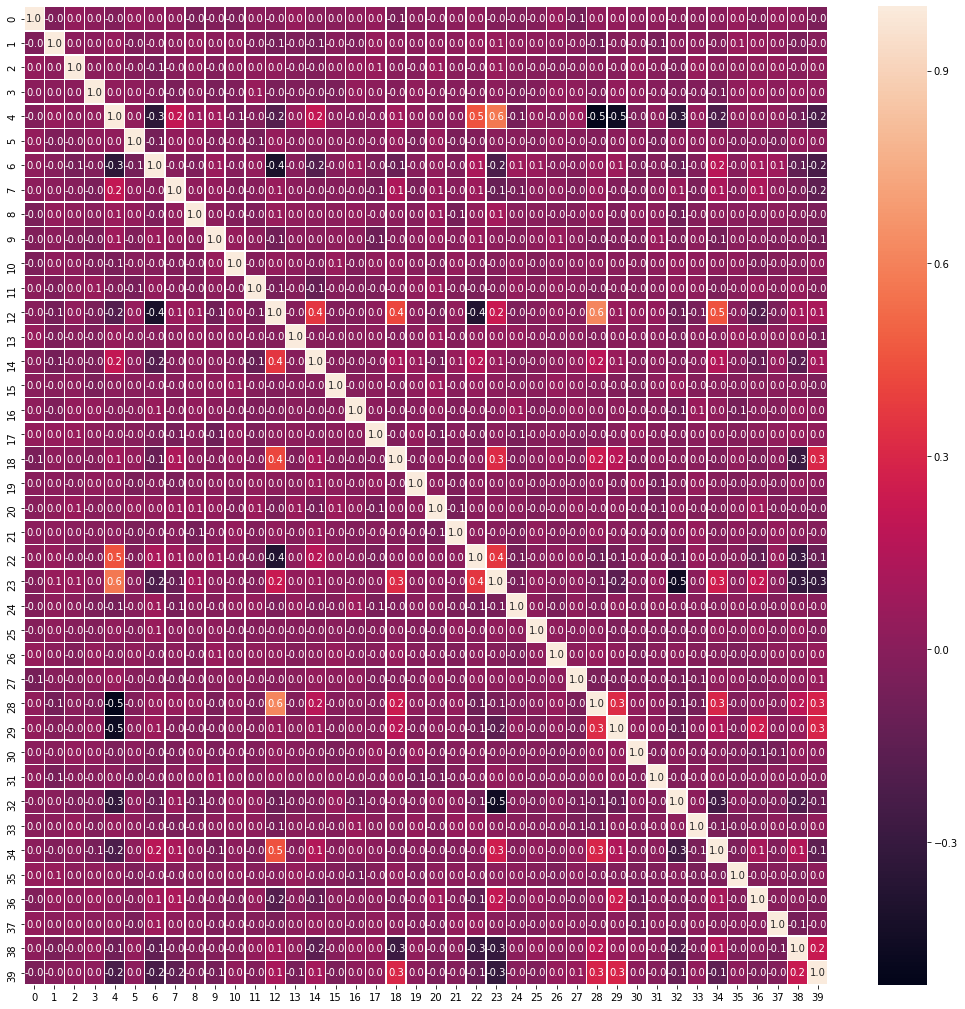

In [47]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pd.DataFrame(X_std).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

C:\Users\LuckyLin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.7933333333333333


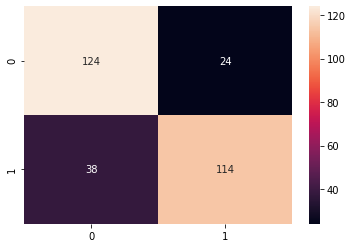

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and val 30 %
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_val,clf_rf.predict(X_val))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_val,clf_rf.predict(X_val))
sns.heatmap(cm,annot=True,fmt="d")

Univariate feature selection is not very accurate because independent variables may correlate with each other. But it can give us a concept. Here we directly use more robust RFECV

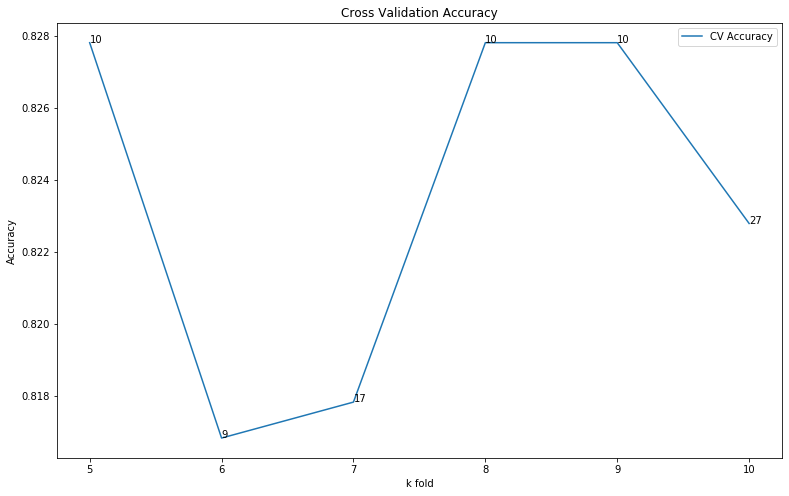

Best Accuracy with feature scaling and RFECV: 0.8278181818181818


In [49]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

kfold = 10
bestSVC = None
bestAcc = 0.0
val_accuracy = []
cv_range = np.arange(5, 11)
n_feature = []
for cv in cv_range:
    # Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel="linear")
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator=svc, step=1, cv=cv, scoring='accuracy')
    rfecv.fit(X_std, y)

    # print("Optimal number of features : %d" % rfecv.n_features_)
    # print('Best features :', pd.DataFrame(X_train).columns[rfecv.support_])
    
    # Model complexity
    val_accuracy += [np.mean(cross_val_score(svc, X_std[:, rfecv.support_], y, cv=kfold))]
    n_feature.append(rfecv.n_features_)
    if val_accuracy[-1] > bestAcc:
        bestAcc = val_accuracy[-1]

# Plot
plt.figure(figsize=[13,8])
plt.plot(cv_range, val_accuracy, label = 'CV Accuracy')
for i in range(len(cv_range)):
    plt.annotate(str(n_feature[i]), xy=(cv_range[i],val_accuracy[i]))
plt.legend()
plt.title('Cross Validation Accuracy')
plt.xlabel('k fold')
plt.ylabel('Accuracy')
plt.show()

print('Best Accuracy with feature scaling and RFECV:', bestAcc)


In [50]:
import numpy as np
#import sklearn as sk
#import matplotlib.pyplot as plt
import pandas as pd

#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import Perceptron
#from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import VotingClassifier
#from sklearn import svm

#### READING OUR GIVEN DATA INTO PANDAS DATAFRAME ####
x_train = train
y_train = trainLabel
x_test = test
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_train = y_train.ravel()

print('training_x Shape:',x_train.shape,',training_y Shape:',y_train.shape, ',testing_x Shape:',x_test.shape)

#Checking the models
x_all = np.r_[x_train,x_test]
print('x_all shape :',x_all.shape)

#### USING THE GAUSSIAN MIXTURE MODEL ####
from sklearn.mixture import GaussianMixture
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
best_gmm.fit(x_all)
x_train = best_gmm.predict_proba(x_train)
x_test = best_gmm.predict_proba(x_test)


#### TAKING ONLY TWO MODELS FOR KEEPING IT SIMPLE ####
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

param_grid = dict( )
#### GRID SEARCH for BEST TUNING PARAMETERS FOR KNN #####
grid_search_knn = GridSearchCV(knn,param_grid=param_grid,cv=10,scoring='accuracy').fit(x_train,y_train)
print('best estimator KNN:',grid_search_knn.best_estimator_,'Best Score', grid_search_knn.best_estimator_.score(x_train,y_train))
knn_best = grid_search_knn.best_estimator_

#### GRID SEARCH for BEST TUNING PARAMETERS FOR RandomForest #####
grid_search_rf = GridSearchCV(rf, param_grid=dict( ), verbose=3,scoring='accuracy',cv=10).fit(x_train,y_train)
print('best estimator RandomForest:',grid_search_rf.best_estimator_,'Best Score', grid_search_rf.best_estimator_.score(x_train,y_train))
rf_best = grid_search_rf.best_estimator_

knn_best.fit(x_train,y_train)
print(knn_best.predict(x_test)[0:10])
rf_best.fit(x_train,y_train)
print(rf_best.predict(x_test)[0:10])

#### SCORING THE MODELS ####
print('Score for KNN :',cross_val_score(knn_best,x_train,y_train,cv=10,scoring='accuracy').mean())
print('Score for Random Forest :',cross_val_score(rf_best,x_train,y_train,cv=10,scoring='accuracy').max())

### IN CASE WE WERE USING MORE THAN ONE CLASSIFIERS THEN VOTING CLASSIFIER CAN BE USEFUL ###
#clf = VotingClassifier(
#		estimators=[('knn_best',knn_best),('rf_best',rf_best)],
#		#weights=[871856020222,0.907895269918]
#	)
#clf.fit(x_train,y_train)
#print clf.predict(x_test)[0:10]

##### FRAMING OUR SOLUTION #####
knn_best_pred = pd.DataFrame(knn_best.predict(x_test))
rf_best_pred = pd.DataFrame(rf_best.predict(x_test))
#voting_clf_pred = pd.DataFrame(clf.predict(x_test))

knn_best_pred.index += 1
rf_best_pred.index += 1
#voting_clf_pred.index += 1

rf_best_pred.columns = ['Solution']
rf_best_pred['Id'] = np.arange(1,rf_best_pred.shape[0]+1)
rf_best_pred = rf_best_pred[['Id', 'Solution']]
print(rf_best_pred)

#knn_best_pred.to_csv('knn_best_pred.csv')
rf_best_pred.to_csv('Submission_rf.csv', index=False)
#voting_clf_pred.to_csv('voting_clf_pred.csv')

training_x Shape: (999, 40) ,training_y Shape: (999,) ,testing_x Shape: (9001, 40)
x_all shape : (10000, 40)
best estimator KNN: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') Best Score 0.995995995995996
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.990, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.990, total=   0.0s
[CV]  ....................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\LuckyLin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\LuckyLin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\LuckyLin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LuckyLin\Anaconda3\lib\site-packages\sklearn\ens

[CV] .................................... , score=1.000, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.990, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.980, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=1.000, total=   0.0s


C:\Users\LuckyLin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LuckyLin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LuckyLin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LuckyLin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LuckyLin\Anaconda3\lib\site-packages\sklearn\ensemble\f

best estimator RandomForest: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) Best Score 0.996996996996997
[0 1 0 0 0 0 1 0 0 1]
[0 1 0 0 0 0 1 0 0 1]
Score for KNN : 0.9960000000000001
Score for Random Forest : 1.0
        Id  Solution
1        1         0
2        2         1
3        3         0
4        4         0
5        5         0
6        6         0
7        7         1
8        8         0
9        9         0
10      10         1
11      11         1
12      12         0
13      13         0
14      14         0
15      15         0
16     

In [51]:
SubmissionLucky=rf_best_pred
print(SubmissionLucky)
SubmissionLucky.to_csv('SubmissionLucky.csv', index=False)

        Id  Solution
1        1         0
2        2         1
3        3         0
4        4         0
5        5         0
6        6         0
7        7         1
8        8         0
9        9         0
10      10         1
11      11         1
12      12         0
13      13         0
14      14         0
15      15         0
16      16         0
17      17         1
18      18         0
19      19         0
20      20         1
21      21         1
22      22         0
23      23         1
24      24         1
25      25         0
26      26         1
27      27         1
28      28         0
29      29         0
30      30         1
...    ...       ...
8972  8972         1
8973  8973         0
8974  8974         1
8975  8975         0
8976  8976         0
8977  8977         1
8978  8978         0
8979  8979         1
8980  8980         1
8981  8981         1
8982  8982         1
8983  8983         1
8984  8984         0
8985  8985         0
8986  8986         0
8987  8987   